In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
pd.options.display.max_columns = None

In [3]:
dataset1 = pd.read_csv("./datasets/Placement_Data_Full_Class.csv")

dataset1.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [27]:
dataset1.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

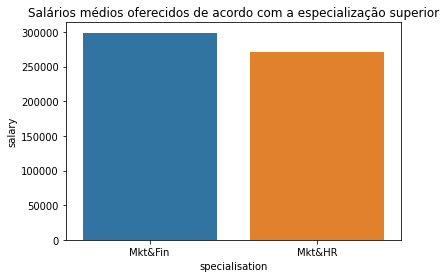

In [82]:
data = dataset1[["specialisation","salary"]].groupby("specialisation").mean()

ax = sns.barplot(x=data.index,y="salary",data=data,order=["Mkt&Fin","Mkt&HR"])

ax.set_title("Salários médios oferecidos de acordo com a especialização superior")

plt.show()

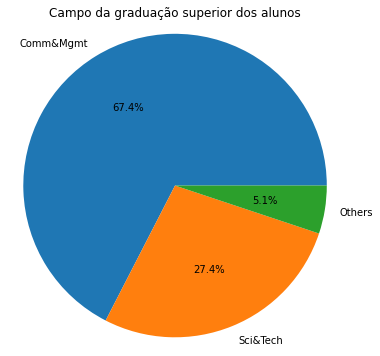

In [107]:
data = dataset1['degree_t'].value_counts(dropna=False)

fig, ax = plt.subplots(figsize=(6,6))

ax.pie(data.values, labels=data.index, autopct='%1.1f%%')

ax.axis('equal')
ax.set_title("Campo da graduação superior dos alunos")

plt.show()

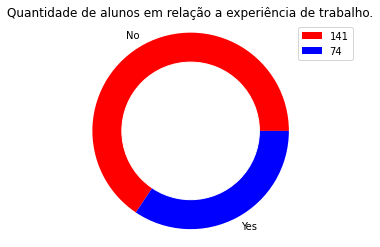

In [106]:
data = dataset1['workex'].value_counts()

fig, ax = plt.subplots()

ax.pie(data.values, labels=data.index, colors=['red','blue'])

ax.set_title("Quantidade de alunos em relação a experiência de trabalho.")
ax.legend(data.values)
ax.axis("equal")

#Circle(xy(centro do circulo), radius(raio do circulo))
circle=plt.Circle( (0,0), 0.7, color='white')

#Obter a figura atual
p=plt.gcf()

#Obter o eixo atual e adicionar o circulo
p.gca().add_artist(circle)

plt.show()

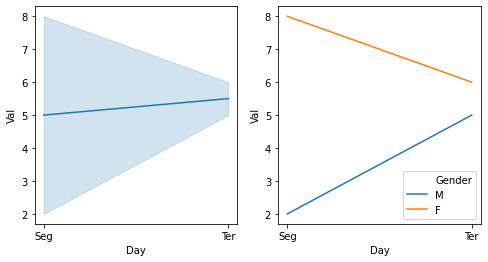

In [16]:
data = pd.DataFrame(data={"Day":["Seg","Seg","Ter","Ter"],"Gender":["M","F","F","M"],"Val":[2,8,6,5]})

fig, ax = plt.subplots(1,2, figsize=(8,4))

sns.lineplot(x="Day",y="Val",data=data,ax=ax[0])
sns.lineplot(x="Day",y="Val",data=data,hue="Gender",ax=ax[1])

plt.show()

Text(0, 0.5, 'Entre y1 and 0')

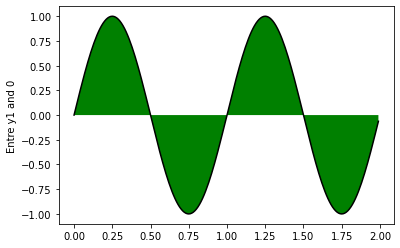

In [21]:
x = np.arange(0.0, 2, 0.01)
y1 = np.sin(2 * np.pi * x)

fig, ax = plt.subplots()

ax.plot(x, y1, color='black')

#Preencher uma regiao fill_between
ax.fill_between(x, 0, y1,facecolor="green")#(regiao preenchida entre 0 e y1)
ax.set_ylabel('Entre 0 and y1')

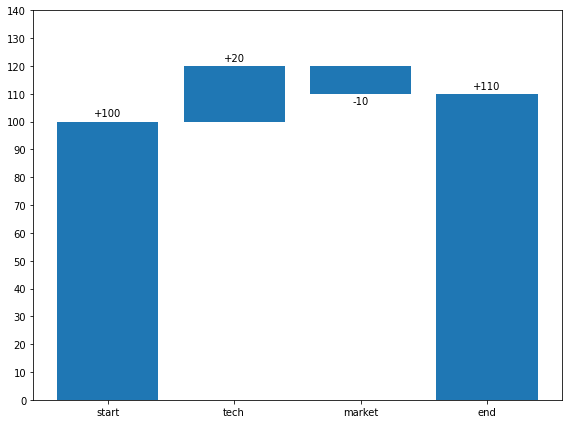

In [47]:
x = ["start","tech","market","end"]
y = [100,20,-10,110]
base= [0,100,120,0]

fig,ax = plt.subplots(figsize=(8,6))

rect = ax.bar(x,y,bottom=base)
ax.set_yticks(np.arange(0,150,10))

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
   
    for rect in rects:
        val = rect.get_height()
        
        height = rect.get_y() + val
        
        ax.annotate('+{}'.format(val) if val >= 0 else '{}'.format(val),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext= (0, 3) if val >= 0 else (0,-12),  #verticals offset
                    textcoords="offset points",
                    ha='center', va='bottom')    

autolabel(rect)
fig.tight_layout()

plt.show()

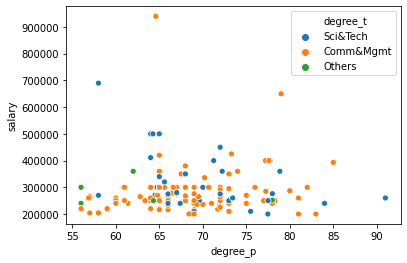

In [6]:
fig, ax = plt.subplots()

sns.scatterplot(x="degree_p",y="salary",data=dataset1,hue="degree_t", ax=ax)

plt.show()

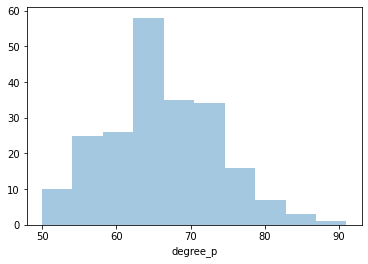

In [8]:
fig,ax = plt.subplots()

sns.distplot(dataset1["degree_p"],kde=False,ax=ax,bins=10)

plt.show()

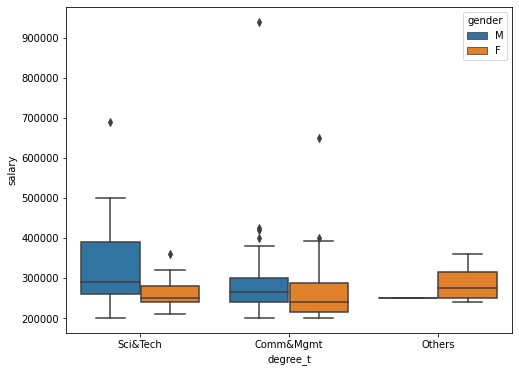

In [11]:
fig,ax = plt.subplots(figsize=(8,6))

sns.boxplot(x="degree_t",y="salary",hue="gender",data=dataset1,ax=ax)

plt.show()